In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
groove_density = 300  # grooves per mm
d = 1e-3 / (groove_density)  # grating spacing in meters (converted from mm to meters)
wavelength = 633e-9  # wavelength in meters (e.g., 633 nm for HeNe laser)
N = 1000  # number of grooves illuminated
L = 0.005  # distance to screen in meters
s = 0.1e-4  # slit width

# Angle of incidence (in degrees and converted to radians)
alpha_deg = 0 # incident angle in degrees
alpha = np.radians(alpha_deg)  # convert to radians

In [2]:
#Angle range for simulation (in radians)
theta = np.linspace(-0.5, 0.5, 1000)  # simulate angles between -0.5 and +0.5 radians

def angle(d, alpha, m, wavelength):
    sin_theta = np.sin(alpha) + (m * wavelength) / d
    if np.abs(sin_theta) <= 1:  # Ensure the value is within valid range
        return np.arcsin(sin_theta)
    else:
        return None  # Return None if out of range

angles = []
for m in range(-2, 3):  # Calculate for negative, zero, and positive orders
    angle_m = angle(d, alpha, m, wavelength)
    if angle_m is not None:
        angles.append(angle_m)

In [3]:
print(angles)
print(np.tan(angles)*L)
print(r"Winkel $\alpha$ muss {:.2f} Grad sein".format(np.rad2deg(np.arcsin(wavelength / d))))
print(np.arcsin(wavelength / d))

[-0.3895800866997021, -0.19106029214617076, 0.0, 0.19106029214617076, 0.3895800866997021]
[-0.00205282 -0.0009671   0.          0.0009671   0.00205282]
Winkel $\alpha$ muss 10.95 Grad sein
0.19106029214617076


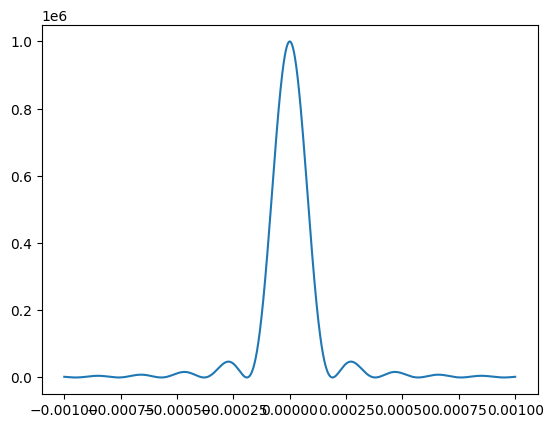

In [4]:
# Calculate intensity distribution
def calculate_intensity(all_angles, N, d, s, wavelength, alpha):
    p = np.sin(x) - np.sin(alpha)
    I_p = ((np.sin((N * np.pi * d * p/wavelength)) / (np.sin((np.pi * d * p/ wavelength))))**2 *
            (np.sin((np.pi * s * p/ wavelength)) / ((np.pi * s * p/ wavelength)))**2)
    return I_p


x = np.linspace(-0.001, 0.001, 1000)  # Position on the screen
theta = np.arctan(x / L)
y = calculate_intensity(theta, N, d, s, wavelength, alpha)
plt.plot(x,y)

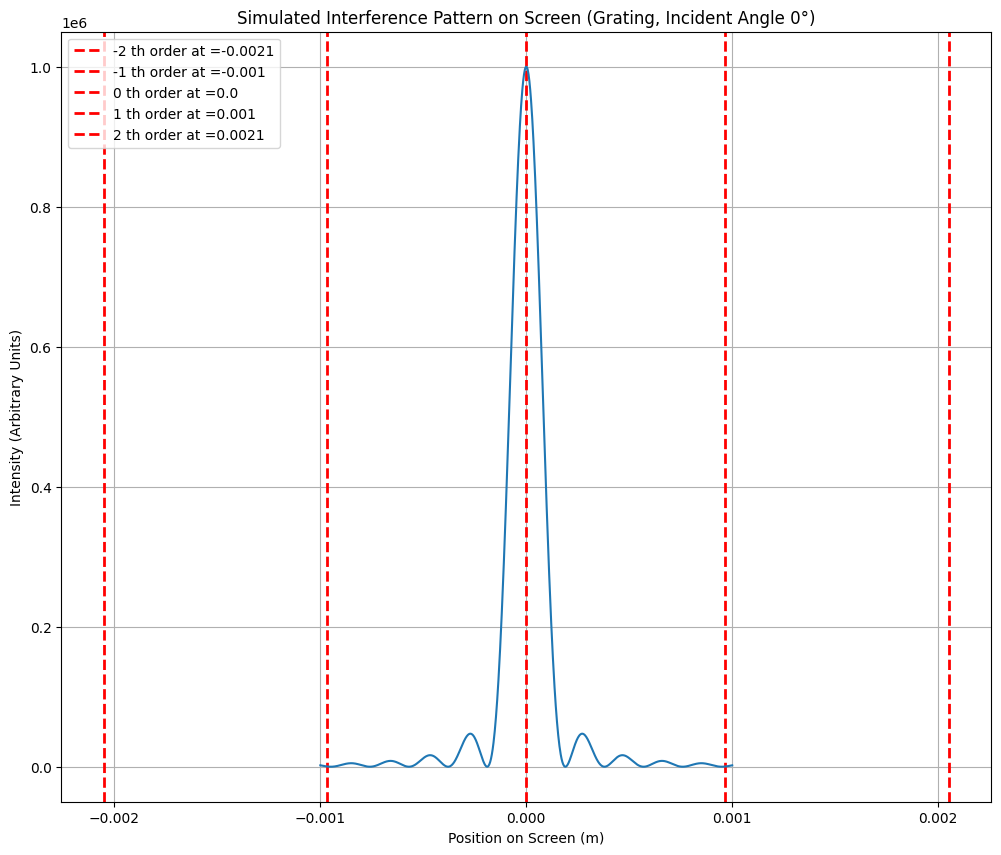

In [5]:
# Convert angles to screen positions (y = L * tan(theta))
plt.figure(figsize=(12,10))
screen_positions = L * np.tan(np.array(angles))
i = -2
pos_of_angles = np.tan(angles)*L
for pos in pos_of_angles:
    plt.axvline(x=pos, color='red', linestyle='--', linewidth=2, label='{} th order at ={}'.format(i,round(pos,4)))
    i+=1

plt.plot(x,y)
plt.title(f'Simulated Interference Pattern on Screen (Grating, Incident Angle {alpha_deg}°)')
plt.xlabel('Position on Screen (m)')
plt.ylabel('Intensity (Arbitrary Units)')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()



In [6]:
screen_positions

array([-0.00205282, -0.0009671 ,  0.        ,  0.0009671 ,  0.00205282])

Angles (radians): [-0.3895800866997021, -0.19106029214617076, 0.0, 0.19106029214617076, 0.3895800866997021]
Screen positions (m): [-0.00205282 -0.0009671   0.          0.0009671   0.00205282]


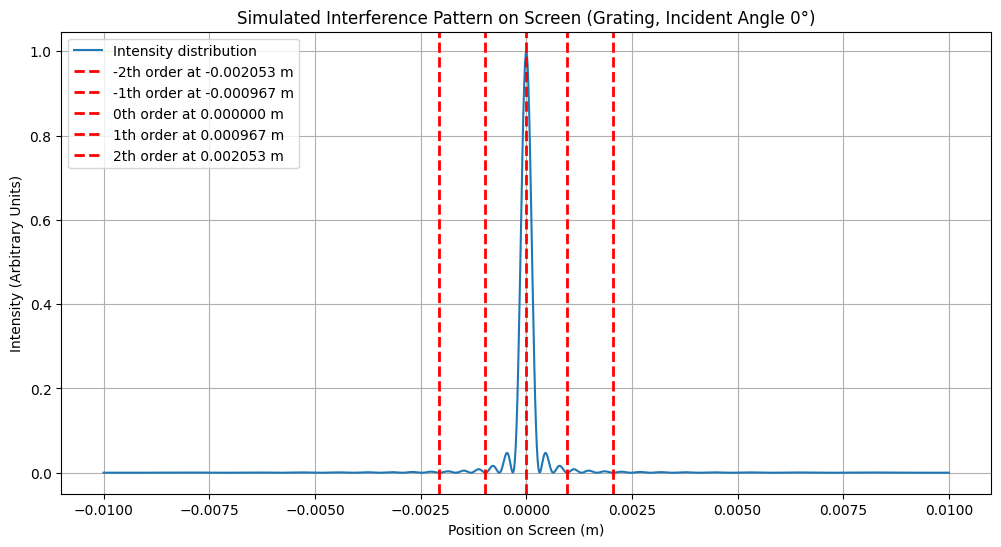

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
groove_density = 300  # grooves per mm
d = 1e-3 / groove_density  # grating spacing in meters (converted from mm to meters)
wavelength = 633e-9  # wavelength in meters (e.g., 633 nm for HeNe laser)
N = 1  # number of grooves illuminated
L = 0.005  # distance to screen in meters
s = 0.1e-4  # slit width

# Angle of incidence (in degrees and converted to radians)
alpha_deg = 0  # incident angle in degrees
alpha = np.radians(alpha_deg)  # convert to radians

# Function to calculate diffraction angle for a given order
def angle(d, alpha, m, wavelength):
    sin_theta = np.sin(alpha) + (m * wavelength) / d
    if np.abs(sin_theta) <= 1:  # Ensure the value is within valid range
        return np.arcsin(sin_theta)
    else:
        return None  # Return None if out of range

# Calculate angles for different diffraction orders
angles = []
for m in range(-2, 3):  # Calculate for negative, zero, and positive orders
    angle_m = angle(d, alpha, m, wavelength)
    if angle_m is not None:
        angles.append(angle_m)

# Print calculated angles and corresponding screen positions
print("Angles (radians):", angles)
print("Screen positions (m):", np.tan(angles) * L)

# Calculate intensity distribution
def calculate_intensity(theta, N, d, s, wavelength, alpha):
    # Phase difference for grating and slit interference
    p = np.sin(theta) - np.sin(alpha)
    
    # Intensity for the diffraction grating (from N grooves)
    I_grating = (np.sin(N * np.pi * d * p / wavelength) / (np.sin(np.pi * d * p / wavelength)))**2
    
    # Intensity for the single slit diffraction
    I_slit = (np.sin(np.pi * s * p / wavelength) / (np.pi * s * p / wavelength))**2
    
    # Total intensity is the product of both
    I_total = I_grating * I_slit
    return I_total

# Screen positions (x)
x = np.linspace(-0.01, 0.01, 1000)  # Position on the screen
theta = np.arctan(x / L)  # Corresponding angles

# Compute intensity at each screen position
y = calculate_intensity(theta, N, d, s, wavelength, alpha)

# Plot intensity distribution
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Intensity distribution')

# Mark the calculated maxima (diffraction orders) on the screen
screen_positions = L * np.tan(np.array(angles))  # Convert angles to screen positions
i = -2  # Start with -2nd order
for pos in screen_positions:
    plt.axvline(x=pos, color='red', linestyle='--', linewidth=2, label=f'{i}th order at {pos:.6f} m')
    i += 1

# Final plot details
plt.title(f'Simulated Interference Pattern on Screen (Grating, Incident Angle {alpha_deg}°)')
plt.xlabel('Position on Screen (m)')
plt.ylabel('Intensity (Arbitrary Units)')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()
